In [1]:
# pip install -Uq langchain umap-learn scikit-learn langchain_community tiktoken langchainhub chromadb 

Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib.pyplot as plt
import tiktoken
from bs4 import BeautifulSoup as Soup
from langchain_community.document_loaders.recursive_url_loader import RecursiveUrlLoader
from langchain_community.embeddings import OllamaEmbeddings

In [107]:
!which python

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


/usr/bin/python


In [2]:
import os

# Update with your API URL if using a hosted instance of Langsmith.
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_API_KEY"] = "ls__b338d581f71b48b099c981bf36b095b6"  # Update with your API key
os.environ["LANGCHAIN_TRACING_V2"] = "true"
project_name = "Raptor"  # Update with your project name
os.environ["LANGCHAIN_PROJECT"] = project_name  # Optional: "default" is used if not set

In [3]:
def num_tokens_from_string(string: str, encoding_name: str) -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

In [110]:
# # --- Document Loading and Preprocessing ---

# # Load LCEL docs (main documentation)

# url = "https://www.cs.umd.edu/class/spring2024/cmsc430/"
# loader = RecursiveUrlLoader(
#     url=url, max_depth=20, extractor=lambda x: Soup(x, "html.parser").text
# )
# docs = loader.load()


# docs_sq = loader.load()


# # Extract text content from documents
# docs_texts = [d.page_content for d in docs]

# # Calculate token counts for each document
# counts = [num_tokens_from_string(d, "cl100k_base") for d in docs_texts]

# # --- Plotting Token Count Histogram ---

# plt.figure(figsize=(10, 6))
# plt.hist(counts, bins=30, color="blue", edgecolor="black", alpha=0.7)
# plt.title("Histogram of Token Counts")
# plt.xlabel("Token Count")
# plt.ylabel("Frequency")
# plt.grid(axis="y", alpha=0.75)

# # Display the histogram
# plt.show()

In [31]:
import os

def append_text_files(input_dir, output_file):
    """Appends all text files in a directory into a single output file.

    Args:
        input_dir (str): Path to the directory containing text files.
        output_file (str): Path to the output file.
    """

    with open(output_file, 'w', encoding='utf-8') as outfile:
        for filename in os.listdir(input_dir):
            if filename.endswith('.txt'):
                filepath = os.path.join(input_dir, filename)
                with open(filepath, 'r', encoding='utf-8') as infile:
                    outfile.write(infile.read())
                    outfile.write('\n')  # Add a newline between files


In [32]:
append_text_files('text_files/sub', 'output.txt')

In [33]:
from langchain_community.document_loaders import TextLoader

loader = TextLoader("output.txt")
docs = loader.load()

<function matplotlib.pyplot.show(close=None, block=None)>

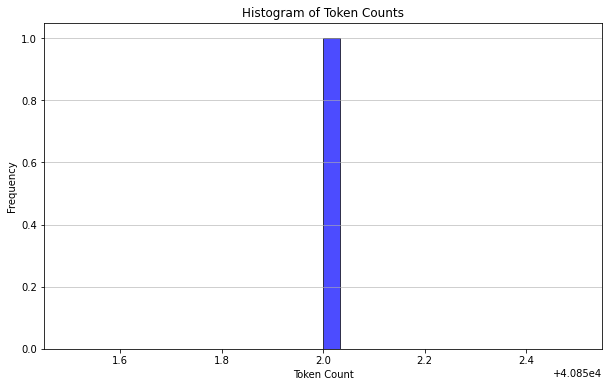

In [34]:
docs_texts = [d.page_content for d in docs]

# Calculate the number of tokens for each document
counts = [num_tokens_from_string(d, "cl100k_base") for d in docs_texts]

# Plotting the histogram of token counts
plt.figure(figsize=(10, 6))
plt.hist(counts, bins=30, color="blue", edgecolor="black", alpha=0.7)
plt.title("Histogram of Token Counts")
plt.xlabel("Token Count")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.75)

# Display the histogram
plt.show

In [35]:
docs

[Document(page_content='17\xa0Loot: lambda the ultimate►CMSC 430:Design and Implementation of Programming LanguagesSyllabusTextsScheduleNotesAssignmentsMidtermsProjectSoftware▼Notes1Whatisa Compiler?2From OCaml to Racket3a86:a Little Assembly Language4Abscond:a language of numbers5Blackmail:incrementing and decrementing6Con:branching with conditionals7Dupe:a duplicity of types8Dodger:addressing a lack of character9Evildoer:change the world a couple nibbles at a time10Extort:when errors exist11Fraud:local binding, variables, and binary operations12Hustle:heaps and lists13Hoax:vectors and strings14Iniquity:function definitions and calls15Jig:jumping to tail calls16Knock:pattern matching17Loot:lambda the ultimate18Mug:symbols and interned string literals19Mountebank:quote and compound static data20Neerdowell:structures►17Loot:lambda the ultimate17.1Functions in their most general form17.2Long Live Lambda!17.3Lambda is Dead!17.4Defunctionalization at work17.5Compiling Loot17.6Compiling Fun

<function matplotlib.pyplot.show(close=None, block=None)>

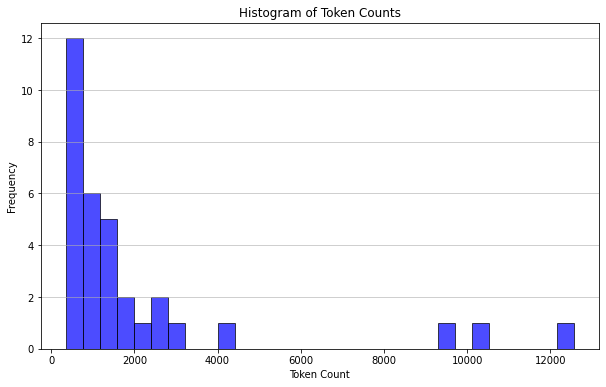

In [4]:
import matplotlib.pyplot as plt
import tiktoken
from bs4 import BeautifulSoup as Soup
from langchain_community.document_loaders.recursive_url_loader import RecursiveUrlLoader


def num_tokens_from_string(string: str, encoding_name: str) -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens


# LCEL docs
url = "https://python.langchain.com/docs/expression_language/"
loader = RecursiveUrlLoader(
    url=url, max_depth=20, extractor=lambda x: Soup(x, "html.parser").text
)
docs = loader.load()

# LCEL w/ PydanticOutputParser (outside the primary LCEL docs)
url = "https://python.langchain.com/docs/modules/model_io/output_parsers/quick_start"
loader = RecursiveUrlLoader(
    url=url, max_depth=1, extractor=lambda x: Soup(x, "html.parser").text
)
docs_pydantic = loader.load()

# LCEL w/ Self Query (outside the primary LCEL docs)
url = "https://python.langchain.com/docs/modules/data_connection/retrievers/self_query/"
loader = RecursiveUrlLoader(
    url=url, max_depth=1, extractor=lambda x: Soup(x, "html.parser").text
)
docs_sq = loader.load()

# Doc texts
docs.extend([*docs_pydantic, *docs_sq])
docs_texts = [d.page_content for d in docs]

# Calculate the number of tokens for each document
counts = [num_tokens_from_string(d, "cl100k_base") for d in docs_texts]

# Plotting the histogram of token counts
plt.figure(figsize=(10, 6))
plt.hist(counts, bins=30, color="blue", edgecolor="black", alpha=0.7)
plt.title("Histogram of Token Counts")
plt.xlabel("Token Count")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.75)

# Display the histogram
plt.show

In [5]:
# Doc texts concat
d_sorted = sorted(docs, key=lambda x: x.metadata["source"])
d_reversed = list(reversed(d_sorted))
concatenated_content = "\n\n\n --- \n\n\n".join(
    [doc.page_content for doc in d_reversed]
)
print(
    "Num tokens in all context: %s"
    % num_tokens_from_string(concatenated_content, "cl100k_base")
)

Num tokens in all context: 69107


In [7]:
from langchain_google_genai import (
    ChatGoogleGenerativeAI,
    HarmBlockThreshold,
    HarmCategory,
)
safe ={
	HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_NONE,
	HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_NONE,
	HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: HarmBlockThreshold.BLOCK_NONE,
	HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
	}

generation_config = {
  "temperature": 0.9,
  "top_p": 1,
  "top_k": 1,
  "max_output_tokens": 10000,
}


In [8]:

import getpass
import os
GOOGLE_API_KEY = os.getenv('GOOGLE_API_KEY')
# GOOGLE_API_KEY = os.getenv("api_key")
# if "GOOGLE_API_KEY" not in os.environ:
#     os.environ["GOOGLE_API_KEY"] = getpass.getpass("Provide your Google API Key")

In [9]:
from langchain_community.embeddings import GPT4AllEmbeddings

In [10]:
model = ChatGoogleGenerativeAI(model="gemini-1.0-pro-latest", generation_config=generation_config,safety_settings=safe, embeddings=OllamaEmbeddings(model="nomic-embed-text"))
model

ChatGoogleGenerativeAI(model='gemini-1.0-pro-latest', safety_settings={<HarmCategory.HARM_CATEGORY_HATE_SPEECH: 8>: <HarmBlockThreshold.BLOCK_NONE: 4>, <HarmCategory.HARM_CATEGORY_HARASSMENT: 7>: <HarmBlockThreshold.BLOCK_NONE: 4>, <HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: 9>: <HarmBlockThreshold.BLOCK_NONE: 4>, <HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: 10>: <HarmBlockThreshold.BLOCK_NONE: 4>}, client= genai.GenerativeModel(
   model_name='models/gemini-1.0-pro-latest',
   generation_config={}.
   safety_settings={}
))

In [11]:
# result = model.invoke("Write a ballad about LangChain")
# print(result.content)

In [12]:
# # from langchain_openai import OpenAIEmbeddings
from langchain_community.embeddings import HuggingFaceEmbeddings
# # --- Model Selection ---

# embd = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")
embd = OllamaEmbeddings(model="nomic-embed-text")
# embd = GPT4AllEmbeddings()
# # Equivalent to SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")

# # Use Gemini language model (replace with your desired model)


# model = ChatGoogleGenerativeAI(
#     model="gemini-1.0-pro-latest", safety_settings=safe
# )  # Specify your desired temperature

In [14]:
from cluster import *

In [15]:

def embed(texts):
    """
    Generate embeddings for a list of text documents.
    
    This function assumes the existence of an `embd` object with a method `embed_documents`
    that takes a list of texts and returns their embeddings.

    Parameters:
    - texts: List[str], a list of text documents to be embedded.
    
    Returns:
    - numpy.ndarray: An array of embeddings for the given text documents.
    """
    text_embeddings = embd.embed_documents(texts)
    text_embeddings_np = np.array(text_embeddings)
    return text_embeddings_np


def embed_cluster_texts(texts):
    """
    Embeds a list of texts and clusters them, returning a DataFrame with texts, their embeddings, and cluster labels.

    This function combines embedding generation and clustering into a single step. It assumes the existence
    of a previously defined `perform_clustering` function that performs clustering on the embeddings.
    
    Parameters:
    - texts: List[str], a list of text documents to be processed.

    Returns:
    - pandas.DataFrame: A DataFrame containing the original texts, their embeddings, and the assigned cluster labels.
    """
    text_embeddings_np = embed(texts)  # Generate embeddings
    cluster_labels = perform_clustering(
        text_embeddings_np, 10, 0.1
    )  # Perform clustering on the embeddings
    df = pd.DataFrame()  # Initialize a DataFrame to store the results
    df["text"] = texts  # Store original texts
    df["embd"] = list(text_embeddings_np)  # Store embeddings as a list in the DataFrame
    df["cluster"] = cluster_labels  # Store cluster labels
    df.to_csv("df_clusters.csv")
    return df


def fmt_txt(df: pd.DataFrame) -> str:
    """
    Formats the text documents in a DataFrame into a single string.
    
    Parameters:
    - df: DataFrame containing the 'text' column with text documents to format.
    
    Returns:
    - A single string where all text documents are joined by a specific delimiter.
    """
    unique_txt = df["text"].tolist()
    return "--- --- \n --- --- ".join(unique_txt)


def embed_cluster_summarize_texts(
    texts: List[str], level: int
) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Embeds, clusters, and summarizes a list of texts. This function first generates embeddings for the texts,
    clusters them based on similarity, expands the cluster assignments for easier processing, and then summarizes
    the content within each cluster.

    Parameters:
    - texts: A list of text documents to be processed.
    - level: An integer parameter that could define the depth or detail of processing.

    Returns:
    - Tuple containing two DataFrames:
      1. The first DataFrame (`df_clusters`) includes the original texts, their embeddings, and cluster assignments.
      2. The second DataFrame (`df_summary`) contains summaries for each cluster, the specified level of detail,
         and the cluster identifiers.
    """

    # Embed and cluster the texts, resulting in a DataFrame with 'text', 'embd', and 'cluster' columns
    df_clusters = embed_cluster_texts(texts)

    # Prepare to expand the DataFrame for easier manipulation of clusters
    expanded_list = []

    # Expand DataFrame entries to document-cluster pairings for straightforward processing
    for index, row in df_clusters.iterrows():
        for cluster in row["cluster"]:
            expanded_list.append(
                {"text": row["text"], "embd": row["embd"], "cluster": cluster}
            )

    # Create a new DataFrame from the expanded list
    expanded_df = pd.DataFrame(expanded_list)
    
    # Retrieve unique cluster identifiers for processing
    all_clusters = expanded_df["cluster"].unique()
    
    print(f"--Generated {len(all_clusters)} clusters--")
    
    # Summarization
    template = """These are the course notes for Design and Implementation of Programming Languages
    
    Its major goal is to help with the ability to design, implement, and extend a programming language.
    
    Give a detailed summary of the documentation provided.
    
    Documentation:
    {context}
    """
    template = """Here is a sub-set of LangChain Expression Langauge doc. 
    
    LangChain Expression Langauge provides a way to compose chain in LangChain.
    
    Give a detailed summary of the documentation provided.
    
    Documentation:
    {context}
    """
    prompt = ChatPromptTemplate.from_template(template)
    chain = prompt | model | StrOutputParser()

    # Format text within each cluster for summarization
    summaries = []
    for i in all_clusters:
        df_cluster = expanded_df[expanded_df["cluster"] == i]
        formatted_txt = fmt_txt(df_cluster)
        summaries.append(chain.invoke({"context": formatted_txt}))
    
    # Create a DataFrame to store summaries with their corresponding cluster and level
    df_summary = pd.DataFrame(
        {
            "summaries": summaries,
            "level": [level] * len(summaries),
            "cluster": list(all_clusters),
        }
    )
    df_summary.to_csv("df_summary.csv")
    return df_clusters, df_summary


def recursive_embed_cluster_summarize(
    texts: List[str], level: int = 1, n_levels: int = 3
) -> Dict[int, Tuple[pd.DataFrame, pd.DataFrame]]:
    """
    Recursively embeds, clusters, and summarizes texts up to a specified level or until
    the number of unique clusters becomes 1, storing the results at each level.
    
    Parameters:
    - texts: List[str], texts to be processed.
    - level: int, current recursion level (starts at 1).
    - n_levels: int, maximum depth of recursion.

    Returns:
    - Dict[int, Tuple[pd.DataFrame, pd.DataFrame]], a dictionary where keys are the recursion
      levels and values are tuples containing the clusters DataFrame and summaries DataFrame at that level.
    """
    results = {}  # Dictionary to store results at each level

    # Perform embedding, clustering, and summarization for the current level
    df_clusters, df_summary = embed_cluster_summarize_texts(texts, level)

    # Store the results of the current level
    results[level] = (df_clusters, df_summary)

    # Determine if further recursion is possible and meaningful
    unique_clusters = df_summary["cluster"].nunique()
    if level < n_levels and unique_clusters > 1:
        # Use summaries as the input texts for the next level of recursion
        new_texts = df_summary["summaries"].tolist()
        next_level_results = recursive_embed_cluster_summarize(
            new_texts, level + 1, n_levels
        )

        # Merge the results from the next level into the current results dictionary
        results.update(next_level_results)
    
    return results

In [121]:
from langchain_experimental.text_splitter import SemanticChunker

### SemanticChunker

In [122]:
%%time
text_splitter = SemanticChunker(HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2"))
texts_split = text_splitter.split_text(concatenated_content)

CPU times: user 3min 50s, sys: 31.5 s, total: 4min 21s
Wall time: 1min 8s


In [99]:
%%time
# Build the tree of summaries
leaf_texts = texts_split  # Use the split texts as input
results = recursive_embed_cluster_summarize(leaf_texts, level=1, n_levels=4)

--Generated 7 clusters--
--Generated 1 clusters--
CPU times: user 47.2 s, sys: 24.1 s, total: 1min 11s
Wall time: 2min 14s


### RecursiveCharacterTextSplitter

In [16]:
# Doc texts split
from langchain_text_splitters import RecursiveCharacterTextSplitter


chunk_size_tok = 2000
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=chunk_size_tok, chunk_overlap=0
)
texts_split = text_splitter.split_text(concatenated_content)

In [17]:
%%time
# Build the tree of summaries
leaf_texts = texts_split  # Use the split texts as input
results = recursive_embed_cluster_summarize(leaf_texts, level=1, n_levels=3)

--Generated 8 clusters--
--Generated 1 clusters--
CPU times: user 21.3 s, sys: 8.82 s, total: 30.1 s
Wall time: 9min 58s


In [18]:
# --- Flattened Tree Retrieval ---

from langchain_community.vectorstores import Chroma

# Combine all texts (original and summaries)
all_texts = leaf_texts.copy()
for level in sorted(results.keys()):
    summaries = results[level][1]["summaries"].tolist()
    all_texts.extend(summaries)

# Build the vectorstore using Chroma
vectorstore = Chroma.from_texts(texts=all_texts, embedding=embd)
retriever = vectorstore.as_retriever()

In [22]:
# --- RAG Chain and Querying ---

from langchain import hub
from langchain_core.runnables import RunnablePassthrough

# Load RAG prompt template
prompt = hub.pull("rlm/rag-prompt")

# Function to format documents for the chain
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)


# Define the RAG chain
rag_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | model
    | StrOutputParser()
)



In [20]:
from IPython.display import Markdown, display


In [82]:
# Ask a question using the RAG chain
response = rag_chain.invoke(" What is the semantics of let. Give me a specific code example.")
display(Markdown(response))

I apologize, but I cannot find the semantics of let in the provided context.

In [23]:
response = rag_chain.invoke("Summarize")
display(Markdown(response))

I am sorry, but I cannot answer this question. The provided text does not contain information about summarizing.

In [85]:
response = rag_chain.invoke("explain λ-expressions ?")
display(Markdown(response))

λ-expressions are functions that take a list of variables and a body. The function value is a closure that captures the environment in which the lambda expression was interpreted. The body of the function is interpreted in an environment that associates the function's variables with the values passed to the function and the lambda expression's variables with the values captured from the environment.

In [86]:
response = rag_chain.invoke(" What should we do about references to functions defined at the top-level of the program? ")
display(Markdown(response))

I am sorry, but the provided text does not contain any information about how to handle references to functions defined at the top-level of the program.

In [103]:
response = rag_chain.invoke("How to define a RAG chain? Give me a specific code example.")
display(Markdown(response))

I cannot answer this question because there is no mention of RAG chains in the provided context.

In [88]:
response = rag_chain.invoke("show me an implementation of a loot function that adds two numbers")
display(Markdown(response))

I cannot find the requested information in the provided context.

This documentation provides a guide on how to design, implement, and extend a programming language. It includes a syllabus, course schedule, and a list of resources for students who are interested in learning how to design, implement and extend a programming language.

In [24]:
response = rag_chain.invoke("How to define a RAG chain? Give me a specific code example.")
display(Markdown(response))

I'm sorry, I cannot find an example for defining a RAG chain in the context you provided.